In [1]:
# utilities
import re
import pickle
import numpy as np
import pandas as pd
import json
import os
from os.path import join

# plotting
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
float_formatter = "{:.4f}".format
np.set_printoptions(formatter={'float_kind':float_formatter})
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# sklearn
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, plot_confusion_matrix, classification_report, f1_score, roc_auc_score,roc_curve,auc

# Features Extraction
from sklearn.feature_extraction.text import TfidfVectorizer

#---Neural Network
from sklearn.neural_network import MLPClassifier

#---Multiclass Classification
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB, MultinomialNB

import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from xgboost import XGBRegressor
from xgboost import XGBRFRegressor


In [ ]:
# !pip3 install xgboost
# import xgboost as xgb
# from xgboost.sklearn import XGBClassifier
# from xgboost import XGBRegressor
# from xgboost import XGBRFRegressor

In [2]:
## Runing on Colab
## /content/drive/MyDrive/git/cyberbullying/input/hate_speech/MMHS150K_GT.json
# dataset_directory = '/content/drive/MyDrive/git/cyberbullying/input/hate_speech' 
# img_txt_directory = '/content/drive/MyDrive/git/cyberbullying/input/hate_speech/img_txt' 
# img_resized_directory = '/content/drive/MyDrive/git/cyberbullying/input/hate_speech/img_resized' 
# splits_directory = '/content/drive/MyDrive/git/cyberbullying/input/hate_speech/splits' 

## Runing on Local
dataset_directory = 'D:\\git\\cyberbullying\\input\\hate_speech' 
# img_txt_directory = 'D:\\git\\cyberbullying\\input\\hate_speech\\img_txt' 
# img_resized_directory = 'D:\\git\\cyberbullying\\input\\hate_speech\\img_resized' 
# splits_directory = 'D:\\git\\cyberbullying\\input\\hate_speech\\splits' 

In [3]:
with open(join(dataset_directory,'MMHS150K_GT.json')) as json_file:
    hate_speech_data = json.load(json_file)

In [4]:
hate_speech_ori = pd.DataFrame(hate_speech_data)

In [5]:
hate_speech_ori = hate_speech_ori.transpose()
hate_speech_ori=hate_speech_ori.reset_index()
hate_speech_ori.rename(columns={"index": "user_id"},inplace=True)

In [6]:
hate_speech_ori.head(5)

,user_id,img_url,labels,tweet_url,tweet_text,labels_str
0,1114679353714016256,http://pbs.twimg.com/tweet_video_thumb/D3gi9MH...,"[4, 1, 3]",https://twitter.com/user/status/11146793537140...,@FriskDontMiss Nigga https://t.co/cAsaLWEpue,"[Religion, Racist, Homophobe]"
1,1063020048816660480,http://pbs.twimg.com/ext_tw_video_thumb/106301...,"[5, 5, 5]",https://twitter.com/user/status/10630200488166...,My horses are retarded https://t.co/HYhqc6d5WN,"[OtherHate, OtherHate, OtherHate]"
2,1108927368075374593,http://pbs.twimg.com/media/D2OzhzHUwAADQjd.jpg,"[0, 0, 0]",https://twitter.com/user/status/11089273680753...,“NIGGA ON MA MOMMA YOUNGBOY BE SPITTING REAL S...,"[NotHate, NotHate, NotHate]"
3,1114558534635618305,http://pbs.twimg.com/ext_tw_video_thumb/111401...,"[1, 0, 0]",https://twitter.com/user/status/11145585346356...,RT xxSuGVNGxx: I ran into this HOLY NIGGA TODA...,"[Racist, NotHate, NotHate]"
4,1035252480215592966,http://pbs.twimg.com/media/Dl30pGIU8AAVGxO.jpg,"[1, 0, 1]",https://twitter.com/user/status/10352524802155...,“EVERYbody calling you Nigger now!” https://t....,"[Racist, NotHate, Racist]"


In [7]:
hate_speech_df = hate_speech_ori.copy()

## Preprocessing Dataset

In [8]:
import nltk
import string
from nltk import tokenize, pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer, word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
nltk.download('rslp')
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hnbhu\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\hnbhu\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hnbhu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package rslp to
[nltk_data]     C:\Users\hnbhu\AppData\Roaming\nltk_data...
[nltk_data]   Package rslp is already up-to-date!


In [9]:
preprocess_df=hate_speech_df.copy()

In [10]:
preprocess_df['labels'].value_counts

<bound method IndexOpsMixin.value_counts of 0         [4, 1, 3]
1         [5, 5, 5]
2         [0, 0, 0]
3         [1, 0, 0]
4         [1, 0, 1]
            ...    
149818    [2, 5, 0]
149819    [0, 0, 0]
149820    [0, 1, 0]
149821    [1, 0, 0]
149822    [0, 0, 3]
Name: labels, Length: 149823, dtype: object>

In [ ]:
# deal with the NaN values in the data
# sns.heatmap(preprocess_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
# processedtext=[]
# for lis in preprocess_df['tweet_text']:
#     processedtext.append(lis)
# processedtext[1:5]

In [ ]:
# preprocess_df['text_lem'] = [''.join([WordNetLemmatizer().lemmatize(re.sub('[^A-Za-z]',' ',text)) for text in lis]) for lis in preprocess_df['tweet_text']]

In [11]:
# Select first label in hate_speech labels
label_1 = []
for x in preprocess_df['labels'].values:
    label_1.append(x[0])
    
preprocess_df['label_1'] = label_1

## Cleaning the texts

In [12]:
def preprocessing(data):
    stemmer = nltk.stem.RSLPStemmer()
    all_stopwords = stopwords.words('english')
    all_stopwords.remove('not')
    corpus = []
    for tweet in data:
        review = re.sub(r"@[A-Za-z0-9_]+", " ", tweet)
        review = re.sub('RT', ' ', review)
        review = re.sub(r"https?://[A-Za-z0-9./]+", " ", review)
        review = re.sub(r"https?", " ", review)
        review = re.sub('[^a-zA-Z]', ' ', review)
        review = review.lower()
        review = review.split()
        ps = PorterStemmer()
        review = [ps.stem(word) for word in review if not word in set(all_stopwords) if len(word) > 2] 
        review = ' '.join(review)
        corpus.append(review)

    return np.array(corpus)

In [13]:
corpus = preprocessing(preprocess_df['tweet_text'])
corpus.shape

(149823,)

In [14]:
corpus

array(['nigga', 'hors retard',
       'nigga momma youngboy spit real shit nigga', ...,
       'nigga big shitti',
       'say nigga rich amp said anger mmph lhhni lhhnyreunion',
       'nigga joe budden said thano got galact ass'], dtype='<U110')

## Train test split

In [15]:
# Split the dataset for training and validation set with the ratio of 80% and 20%, respectively.
X_train, X_val, y_train, y_val = train_test_split(corpus,preprocess_df['label_1'],test_size = 0.2,random_state=42)

# X_train, X_test, y_train, y_test = train_test_split(preprocess_df['tweet_text'],preprocess_df['label_1'],test_size = 0.2,random_state=42)
print(f'Data Split done.')
# checking shapes of each
print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_val shape: ", X_val.shape)
print("y_val shape: ", y_val.shape)

Data Split done.
X_train shape:  (119858,)
y_train shape:  (119858,)
X_val shape:  (29965,)
y_val shape:  (29965,)


# TF-IDF

In [16]:
# create the transform
vectorizer = TfidfVectorizer(
        ngram_range=(1,4),
        use_idf=True,
        sublinear_tf=True,
        analyzer="word",
        tokenizer=None,
        preprocessor=None,
        stop_words=('english'),
        # token_pattern="^[a-zA-Z0-9_][a-zA-Z0-9_][a-zA-Z0-9_]*",
        max_features=50
    )

In [ ]:
# # tokenize and build vocab
# vectorizer.fit_trainform(X_train)
# print(f'Vectoriser fitted.')
# print('No. of feature_words: ', len(vectorizer.get_feature_names()))

## Tranforming the dataset
Transforming the X_train and X_test dataset into matrix of TF-IDF Features by using the TF-IDF Vectoriser. This datasets will be used to train the model and test against it.

In [17]:
vectorizer.fit(X_train)

TfidfVectorizer(max_features=50, ngram_range=(1, 4), stop_words='english',
                sublinear_tf=True)

In [18]:
# encode document
X_train = vectorizer.transform(X_train)
X_val  = vectorizer.transform(X_val)

# vect_transformed_X_train = vectorizer.fit_transform(X_train)
# vect_transformed_X_test = vectorizer.fit_transform(X_val)
print(f'Data Transformed.')

Data Transformed.


In [19]:
print(vectorizer.vocabulary_)
print(vectorizer.idf_)

{'cunt': 8, 'dyke': 11, 'redneck': 34, 'nigga': 28, 'look': 22, 'like': 20, 'twat': 46, 'look like': 23, 'happi': 16, 'faggot': 12, 'retard': 35, 'know': 18, 'said': 37, 'say': 38, 'nigger': 30, 'got': 15, 'fuck': 13, 'ass': 1, 'ass nigga': 2, 'surrend': 41, 'buildthewal': 5, 'play': 31, 'time': 43, 'want': 47, 'amp': 0, 'white': 48, 'trash': 44, 'tri': 45, 'white trash': 49, 'shit': 39, 'hillbilli': 17, 'dick': 10, 'need': 27, 'bitch': 4, 'day': 9, 'realli': 33, 'big': 3, 'real': 32, 'sjw': 40, 'love': 24, 'make': 25, 'man': 26, 'lol': 21, 'think': 42, 'card': 6, 'come': 7, 'right': 36, 'good': 14, 'nigga said': 29, 'let': 19}
[5.2783 4.2187 5.1340 5.2557 4.6867 5.1492 5.2855 5.3276 3.3214 5.1002
 5.4693 4.0801 4.2121 3.8257 5.3630 4.3839 5.4463 5.2580 4.7711 5.3033
 3.5883 5.4456 4.2629 5.1429 4.9042 5.1361 5.3033 5.3494 1.6437 5.3213
 4.3522 5.2646 4.7606 4.8866 4.8668 3.7599 5.3604 4.6326 4.5570 4.4996
 5.3283 5.1684 5.1657 5.1226 4.9298 5.4708 3.8946 5.0768 4.7787 5.4470]


In [20]:
# summarize encoded vector
print(X_train.shape)
print(y_train.shape)

(119858, 50)
(119858,)


# 3. Models

## 3.1 LinearSVC

In [ ]:
# load the model from disk
# filename = 'SVM_model_onelabel.sav'
# loaded_model = pickle.load(open(filename, 'rb'))
# result = loaded_model.score(X_test, Y_test)

In [21]:
%%time
svm_clf = SVC(kernel='linear', C=1)
modelSVC = svm_clf.fit(X_train, y_train)
print(f'Training model complete.')

Training model complete.
Wall time: 3min 27s


In [22]:
# # Perform prediction on the training and validation data
y_pred_train_svm_clf = svm_clf.predict(X_train)
y_pred_val_svm_clf = svm_clf.predict(X_val)

# # calculating accuracy score on training set
print("Acc on training set: ", accuracy_score(y_train, y_pred_train_svm_clf))

# # calculating accuracy score on val set
print("Acc on validation set: ", accuracy_score(y_val, y_pred_val_svm_clf))

Acc on training set:  0.7030319211066428
Acc on validation set:  0.703387285166027


In [ ]:
# # save the model to disk
# filename = 'SVM_model_onelabel.sav'
# pickle.dump(svm_clf, open(filename, 'wb'))

# 3.2 Neural Network

In [23]:
%%time
mlp_clf = MLPClassifier(solver='sgd',
                    alpha=1e-5,
                    hidden_layer_sizes=(10,),
                    random_state=1)
mlp_clf.fit(X_train, y_train)
print(f'Training model complete.')

Training model complete.
Wall time: 53.6 s


In [24]:
# # Perform prediction on the training and validation data
y_pred_train_mlp_clf = mlp_clf.predict(X_train)
y_pred_val_mlp_clf = mlp_clf.predict(X_val)

# # calculating accuracy score on training set
print("Acc on training set: ", accuracy_score(y_train, y_pred_train_mlp_clf))

# # calculating accuracy score on val set
print("Acc on validation set: ", accuracy_score(y_val, y_pred_val_mlp_clf))

Acc on training set:  0.7024645830899898
Acc on validation set:  0.7022526280660771


# 3.3 XGBoost

In [25]:
%%time
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)

print(f'Training model complete.')

C:\Users\hnbhu\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:38:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training model complete.
Wall time: 20.2 s


In [26]:
# Predicting the Test set results
y_pred = xgb_clf.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print("Accuracy is: %.4f\n" % accuracy)

Accuracy is: 0.7036



In [27]:
# # Perform prediction on the training and validation data
y_pred_train_xgb_clf = xgb_clf.predict(X_train)
y_pred_val_xgb_clf = xgb_clf.predict(X_val)

# # calculating accuracy score on training set
print("Acc on training set: ", accuracy_score(y_train, y_pred_train_xgb_clf))

# # calculating accuracy score on val set
print("Acc on validation set: ", accuracy_score(y_val, y_pred_val_xgb_clf))

Acc on training set:  0.712392998381418
Acc on validation set:  0.703554146504255


# 4. Pecision, recall, f-score, ROC and AUC charts

## 4.1 precision, recall, f-score

In [28]:
# Create the confussion matrix
def plot_confussion_matrix(y_test, y_pred):
    ''' Plot the confussion matrix for the target labels and predictions '''
    cm = confusion_matrix(y_test, y_pred)

    # Create a dataframe with the confussion matrix values
    df_cm = pd.DataFrame(cm, range(cm.shape[0]),
                  range(cm.shape[1]))
    #plt.figure(figsize = (10,7))
    # Plot the confussion matrix
    sns.set(font_scale=1.4) #for label size
    sns.heatmap(df_cm, annot=True,fmt='.0f',annot_kws={"size": 10})# font size
    plt.show()

              precision    recall  f1-score   support

           0    0.72029   0.95830   0.82242     20984
           1    0.51102   0.11812   0.19188      4123
           2    0.00000   0.00000   0.00000      1512
           3    0.43967   0.42908   0.43431      1121
           4    0.00000   0.00000   0.00000       121
           5    0.00000   0.00000   0.00000      2104

    accuracy                        0.70339     29965
   macro avg    0.27850   0.25092   0.24144     29965
weighted avg    0.59117   0.70339   0.61858     29965



C:\Users\hnbhu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


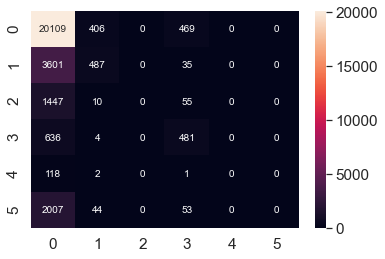

In [29]:
# precision, recall, f-score for LinearSVC
print(metrics.classification_report(y_val, y_pred_val_svm_clf,  digits=5))
plot_confussion_matrix(y_val, y_pred_val_svm_clf)

F1 score is used as an evaluation measure as, when the data is skewed like in this case, where the number of hate speech tweets are very less, accuracy cannot be relied upon.

              precision    recall  f1-score   support

           0    0.71626   0.96516   0.82229     20984
           1    0.51316   0.07567   0.13190      4123
           2    0.00000   0.00000   0.00000      1512
           3    0.44397   0.37467   0.40639      1121
           4    0.00000   0.00000   0.00000       121
           5    0.42963   0.02757   0.05181      2104

    accuracy                        0.70225     29965
   macro avg    0.35050   0.24051   0.23540     29965
weighted avg    0.61897   0.70225   0.61283     29965



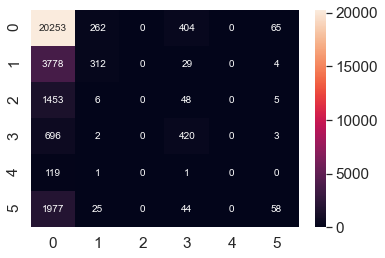

In [30]:
# precision, recall, f-score for neural network
print(metrics.classification_report(y_val, y_pred_val_mlp_clf,  digits=5))
plot_confussion_matrix(y_val, y_pred_val_mlp_clf)

              precision    recall  f1-score   support

           0    0.72271   0.95439   0.82255     20984
           1    0.49191   0.11060   0.18059      4123
           2    0.10526   0.00132   0.00261      1512
           3    0.45776   0.41570   0.43572      1121
           4    0.00000   0.00000   0.00000       121
           5    0.45172   0.06226   0.10944      2104

    accuracy                        0.70355     29965
   macro avg    0.37156   0.25738   0.25849     29965
weighted avg    0.62794   0.70355   0.62498     29965



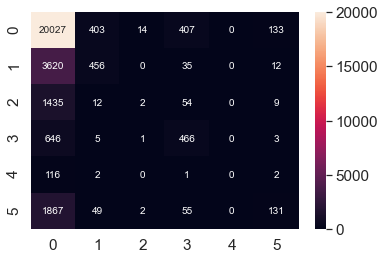

In [31]:
# precision, recall, f-score for XGBoost
print(metrics.classification_report(y_val, y_pred_val_xgb_clf,  digits=5))
plot_confussion_matrix(y_val, y_pred_val_xgb_clf)

## 4.2 ROC and AUC charts

In [32]:
# ROC Curve
# plot no skill
# Calculate the points in the ROC curve
def plot_roc_curve(y_test, y_pred):
    ''' Plot the ROC curve for the target labels and predictions'''
    fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=1)
    roc_auc= auc(fpr,tpr)

    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

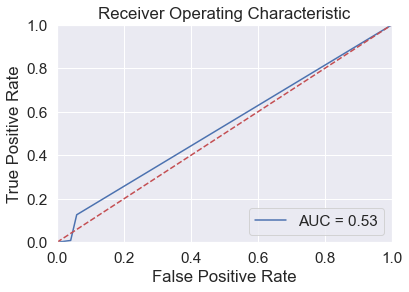

In [33]:
# ROC curve for LinearSVC
plot_roc_curve(y_val, y_pred_val_svm_clf)

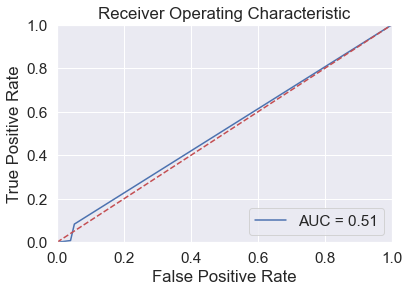

In [34]:
# ROC curve for neural network
plot_roc_curve(y_val, y_pred_val_mlp_clf)

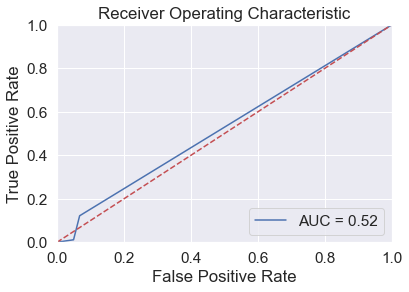

In [35]:
# ROC curve for XGBoost
plot_roc_curve(y_val, y_pred_val_xgb_clf)